In [90]:
import pandas as pd
import seaborn as sns
sns.set_theme(font_scale=1.5)
import os
import matplotlib.pyplot as plt

In [91]:
# Leer todas las labels 

labels_path = '../Data/Labels'
dev_split = pd.read_csv(os.path.join(labels_path, 'dev_split_Depression_AVEC2017.csv'))
dev_split.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,302,0,4,1,1,1,0,1,0,1,0,0
1,307,0,4,0,0,1,0,1,0,2,0,0
2,331,0,8,1,1,1,1,1,1,1,1,1
3,335,1,12,0,1,1,3,2,3,1,1,0
4,346,1,23,0,2,3,3,3,3,3,3,3


In [92]:
full_test = pd.read_csv(os.path.join(labels_path, 'full_test_split.csv'))
full_test.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender
0,300,0,2,1
1,301,0,3,1
2,306,0,0,0
3,308,1,22,0
4,309,1,15,1


In [93]:
train_split = pd.read_csv(os.path.join(labels_path, 'train_split_Depression_AVEC2017.csv'))
train_split.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,303,0,0,0,0,0,0.0,0,0,0,0,0
1,304,0,6,0,0,1,1.0,2,2,0,0,0
2,305,0,7,1,0,1,1.0,2,2,1,0,0
3,310,0,4,1,1,1,0.0,0,0,1,1,0
4,312,0,2,1,0,0,1.0,1,0,0,0,0


In [94]:
# Selecciona las columnas Participant_ID y PHQ8_Binary y Gender para todos los splits y luego concatena los splits
all_splits = pd.concat([dev_split[['Participant_ID', 'PHQ8_Binary','Gender', 'PHQ8_Score']],full_test[['Participant_ID', 'PHQ8_Binary', 'Gender', 'PHQ8_Score']],train_split[['Participant_ID', 'PHQ8_Binary','Gender', 'PHQ8_Score']]])  

# Sort por Participant_ID and reset index
all_splits = all_splits.sort_values(by='Participant_ID').reset_index(drop=True)

all_splits


,Participant_ID,PHQ8_Binary,Gender,PHQ8_Score
0,300,0,1,2
1,301,0,1,3
2,302,0,1,4
3,303,0,0,0
4,304,0,0,6
...,...,...,...,...
184,488,0,0,0
185,489,0,1,3
186,490,0,1,2
187,491,0,0,8


In [95]:
df = all_splits
# Convertir los valores de 'Gender' a cadenas de texto
df['Gender'] = df['Gender'].map({0: 'Female', 1: 'Male'})

In [96]:
# Observaciones con PHQ8 = 10 grouped by PHQ8_Binary
df.loc[df['PHQ8_Score'] == 10].groupby('PHQ8_Binary').size()
df[df['PHQ8_Score'] == 10]

# Remplazar el PHQ8_Binary de 0 a 1 para los participantes con PHQ8_Score = 10
df.loc[df['PHQ8_Score'] == 10, 'PHQ8_Binary'] = 1



In [97]:
df[df['PHQ8_Score'] == 10]

,Participant_ID,PHQ8_Binary,Gender,PHQ8_Score
25,325,1,Female,10
37,337,1,Female,10
51,352,1,Female,10
54,355,1,Male,10
55,356,1,Male,10
79,380,1,Male,10
106,409,1,Male,10
110,413,1,Female,10
115,418,1,Female,10
118,421,1,Female,10


In [98]:
# Percentiles para PHQ8_Score depemdieno de PHQ8_Binary
percentiles = df.groupby('PHQ8_Binary')['PHQ8_Score'].describe(percentiles=[.25, .5, .75])
percentiles

,count,mean,std,min,25%,50%,75%,max
PHQ8_Binary,,,,,,,,
0,132.0,3.469697,2.927728,0.0,1.0,3.0,6.0,9.0
1,57.0,14.333333,3.724117,10.0,11.0,14.0,17.0,23.0


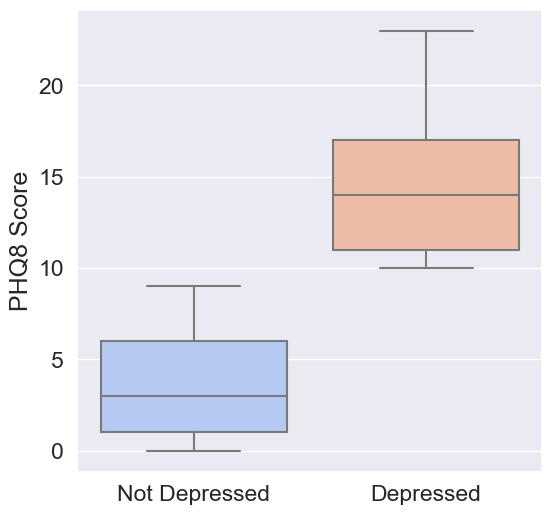

In [99]:
# Boxplot para PHQ8_Score con hue de PHQ8_Binary

plt.figure(figsize=(6, 6))
sns.boxplot(x='PHQ8_Binary', y='PHQ8_Score', data=df, palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['Not Depressed', 'Depressed'])
plt.xlabel('')
plt.ylabel('PHQ8 Score')
plt.show()


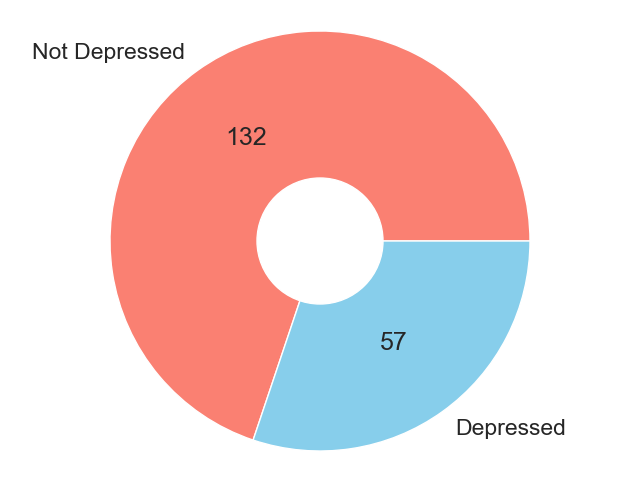

In [100]:
# Plot de tarta para la distribución de género
depressed_counts = df['PHQ8_Binary'].value_counts()
# Crear el gráfico de donut
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(depressed_counts, labels=['Not Depressed', 'Depressed'], autopct=lambda p: '{:.0f}'.format(p * sum(depressed_counts) / 100), colors=['salmon', 'skyblue'], startangle=0)

# Crear un agujero en el centro para convertirlo en un gráfico de donut
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

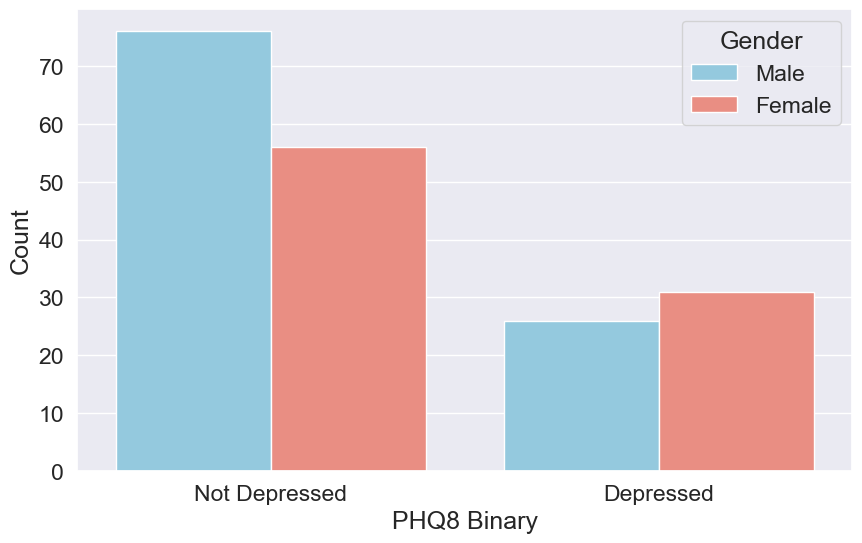

In [101]:
# Plot de conteo para PHQ8_Binary con hue de género
plt.figure(figsize=(10, 6))
sns.countplot(x='PHQ8_Binary', hue='Gender', data=df, palette={'Female': 'salmon', 'Male': 'skyblue'})
plt.xticks(ticks=[0, 1], labels=['Not Depressed', 'Depressed'])
plt.xlabel('PHQ8 Binary')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()